In [1]:
from ds_preamble import *

In [2]:
df = pd.read_csv('bank_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41188 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

<AxesSubplot:xlabel='y'>

<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='y', ylabel='income_yr1'>

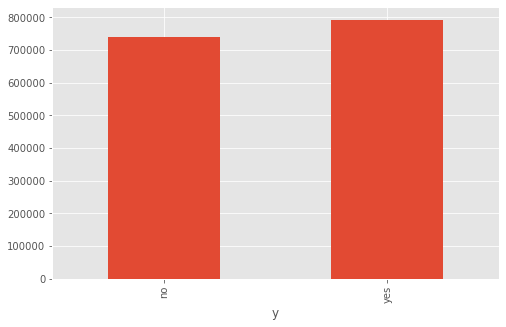

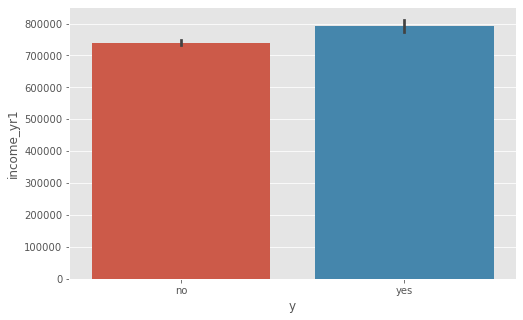

In [3]:
# df.income_yr1

# plt.scatter(df.income_yr1, df.y)

df.groupby('y')['income_yr1'].mean().plot.bar()
plt.figure()
sns.barplot(data=df, x='y', y='income_yr1')


In [4]:
df['age_group']=pd.cut(df.age, bins=[18,31,41,51,61,np.inf], right=False)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,y,gender,balance_unit,balance,income_yr1,income_yr2,income_yr3,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,F,USD,2143 USD,2.786048e+05,2.664948e+05,2.588092e+05,"[51.0, 61.0)"
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,4.857,5191.0,no,F,US,29US,3.013433e+05,2.721156e+05,2.583570e+05,"[51.0, 61.0)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,4.857,5191.0,no,F,HKD,2 HKD,3.221064e+05,3.167844e+05,2.603720e+05,"[31.0, 41.0)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,M,Usd,NaN,2.568696e+05,2.273920e+05,1.995468e+05,"[31.0, 41.0)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,4.857,5191.0,no,F,US,1 US,2.404423e+05,2.155838e+05,2.032015e+05,"[51.0, 61.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1.028,4963.6,yes,F,HK,10253HK,2.337070e+06,2.213367e+06,1.960756e+06,"[61.0, inf)"
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.028,4963.6,no,F,USD,USD347,1.638964e+06,1.536481e+06,1.354816e+06,"[41.0, 51.0)"
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,1.028,4963.6,no,F,USD,USD9962,9.549360e+05,9.581220e+05,8.436968e+05,"[51.0, 61.0)"
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.028,4963.6,yes,M,Usd,2239 Usd,2.248269e+06,2.010492e+06,2.002747e+06,"[41.0, 51.0)"


In [5]:
# .startswith('income_yr')

df['income'] = df.loc[:, df.columns.str.startswith('income_yr')].mean(axis=1)

In [6]:
# df.balance.values[:30]


# df.balance[lambda x: x.isna()]

# df.balance[df.balance.isna()]

type(df.balance[3])


df.balance[3] =='nan'
df.balance[3] == float('nan')

# pd.na()
pd.isna(df.balance[3])

df.balance[3]




float

False

False

True

nan

In [7]:
vals = df.balance.values
vals

array([' 2143 USD', '29US ', '2 HKD', ..., ' USD9962 ', '2239 Usd ',
       'HKD1978 '], dtype=object)

In [8]:
for i, val in enumerate(vals):
    # dollar = int(''.join(c for c in val if c.isdigit()))
    # if val != float('nan'):
    # if val != float('nan'):
    if not pd.isna(val):
        # print([c for c in val if c.isdigit() or c=='-'])
        dollar = int(''.join(c for c in val if c.isdigit() or c=='-'))
        if 'us' in val.lower():
            dollar*=7.8
        vals[i] = dollar

# int('-371')


In [9]:
df.balance

0        16715.4
1          226.2
2              2
3            NaN
4            7.8
          ...   
41183      10253
41184     2706.6
41185    77703.6
41186    17464.2
41187       1978
Name: balance, Length: 41188, dtype: object

In [21]:
df.balance.isna().mean()

med = df.groupby(['age_group', 'gender'])['balance'].median()

med

# df.fillna(med)

0.027945032533747693

age_group     gender
[18.0, 31.0)  F         1123.2
              M         1270.0
[31.0, 41.0)  F         1332.0
              M         1349.4
[41.0, 51.0)  F         1365.0
              M         1257.0
[51.0, 61.0)  F         1290.0
              M         1229.3
[61.0, inf)   F         1271.4
              M         1498.5
Name: balance, dtype: float64

1234